# Assignment 15

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
penguins = sns.load_dataset("penguins")
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
penguins = penguins.fillna({"sex": "Unknown", "bill_length_mm": penguins.bill_length_mm.mean(), "bill_depth_mm": penguins.bill_depth_mm.mean(), "flipper_length_mm": penguins.flipper_length_mm.mean(), "body_mass_g": penguins.body_mass_g.mean()})

In [4]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [5]:
features = ['bill_depth_mm', 'bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=5)

In [6]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [7]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9958333333333333
Accuracy on test set 0.9230769230769231


The accuracy is pretty high, something which i expected since i gave a 2 very well defining features.

In [8]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

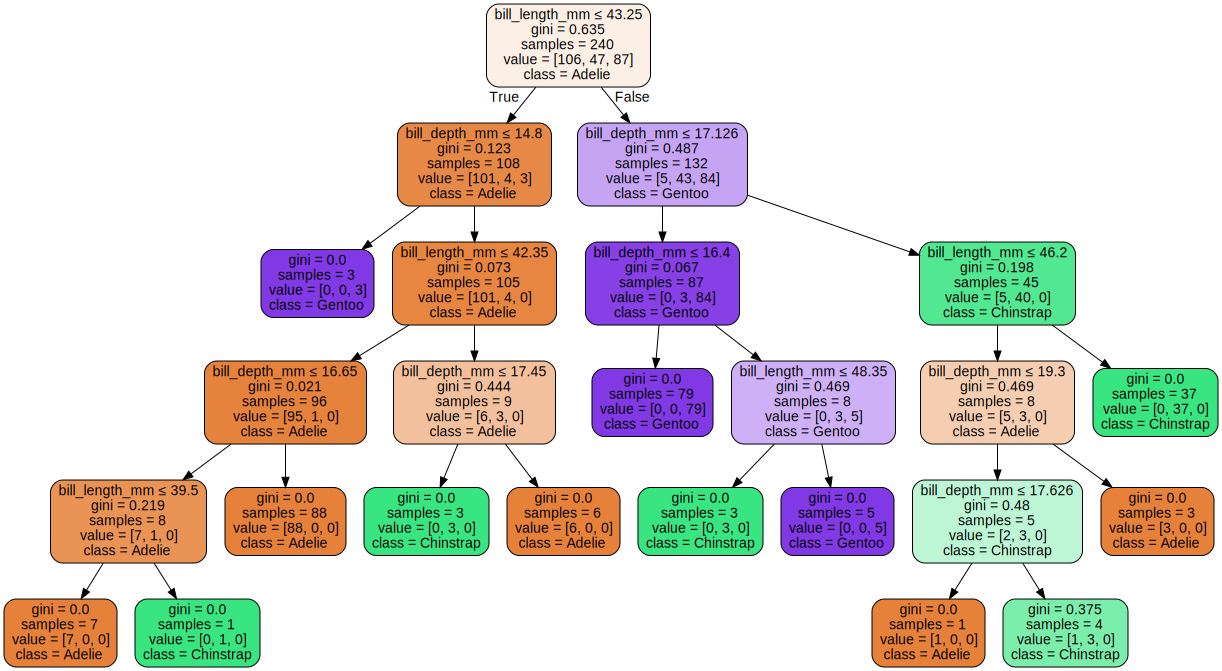

In [9]:
plot_tree_classification(dt_classification, features, penguins.species.unique())

# Assignment 16

In [10]:
vgSales = pd.read_csv("../Assignment 4/vgsales.csv")
vgSales.isna().sum()

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64

In [11]:
vgSales = vgSales.fillna(vgSales.mean())
vgSales = vgSales.fillna("Unknown")

There are too many columns that have empty values to warrent the outright dropping of records. That's why i filled numerical columns with the mean average and categorigal columns with "Unknown"

In [12]:
vgSales.isna().sum()

Rank              0
Name              0
basename          0
Genre             0
ESRB_Rating       0
Platform          0
Publisher         0
Developer         0
VGChartz_Score    0
Critic_Score      0
User_Score        0
Total_Shipped     0
Global_Sales      0
NA_Sales          0
PAL_Sales         0
JP_Sales          0
Other_Sales       0
Year              0
Last_Update       0
url               0
status            0
Vgchartzscore     0
img_url           0
dtype: int64

## Train/test Split

In [13]:
vgSales_train, vgSales_test = train_test_split(vgSales, test_size=0.3, stratify=vgSales['Genre'], random_state=42)
print(vgSales_train.shape, vgSales_test.shape)

(39054, 23) (16738, 23)


In [14]:
features = ['Global_Sales', 'Critic_Score', 'Total_Shipped']
columnToTest = 'Genre'
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(vgSales_train[features], vgSales_train[columnToTest])

DecisionTreeClassifier(max_depth=5)

In [15]:
predictionsOnTrainset = dt_classification.predict(vgSales_train[features])
predictionsOnTestset = dt_classification.predict(vgSales_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, vgSales_train[columnToTest])
accuracyTest = calculate_accuracy(predictionsOnTestset, vgSales_test.Genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.19921134838940954
Accuracy on test set 0.19416895686461944


The accuracy is very low, something which i expected. The data fields i have aren't enough to determine something as vague as the genre. It doesn't help that video game sales and scores can be very sporadic.

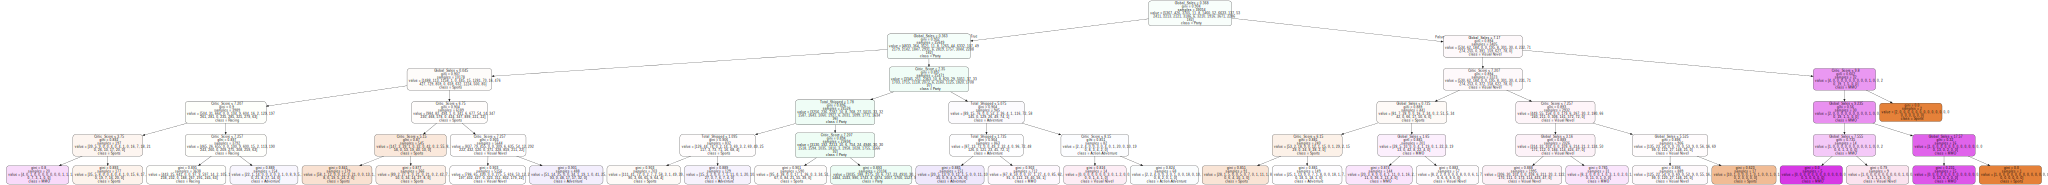

In [16]:
plot_tree_classification(dt_classification, features, vgSales.Genre.unique())